# Exercise 05

**Integrante 1**: Andrea Carolina Parra López.................................................. 	**Código:** 201727740

**Integrante 2:** Ricardo Andrés Medina Aponte...............................................  **Código:** 201628949 


# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.



## Solución por Scikit learn

La base de datos de entrenamiento cuenta con los siguientes datos

In [3]:
import numpy as np
import pandas as pd
d = {'Orejas grandes': [1, 0,0], 'Dientes grandes': [1,1,0], 'Simpatico': [0,1,0],'Arrugado': [0,0,1],
     'Gritar': [1, 0,0], 'Abrazar': [0,0,1], 'Dar comida': [0,1,1],'Besar': [0,1,0]}
df = pd.DataFrame(data=d)
df

,Orejas grandes,Dientes grandes,Simpatico,Arrugado,Gritar,Abrazar,Dar comida,Besar
0,1,1,0,0,1,0,0,0
1,0,1,1,0,0,0,1,1
2,0,0,0,1,0,1,1,0


Se programa una red, con una capa ocutal de tres nodos la cual utiliza como método de activación la función sigmoide.


In [4]:
from sklearn.neural_network import MLPClassifier
X = [[1,1,0,0], [0,1,1,0], [0,0,0,1]]
y = [[1,0,0,0], [0,0,1,1], [0,1,1,0]]
clf = MLPClassifier(solver='lbfgs', alpha=261871e-8,hidden_layer_sizes=(3, 1), random_state=1,max_iter=1000,
                    activation='logistic', warm_start=True)
clf.fit(X, y)


MLPClassifier(activation='logistic', alpha=0.00261871, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)

### Algunas predicciones y probabilidades

Probemos la red para los input

In [75]:
#Orejas y dientes grandes
y=clf.predict([[1,1,0,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,1
Abrazar,0
Dar comida,0
Beso,0


In [76]:
y=clf.predict_proba([[1,1,0,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.960924
Abrazar,0.000023
Dar comida,0.039012
Beso,0.217802


In [77]:
#DIentes grandes y apuesto
y=clf.predict([[0,1,1,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0
Abrazar,0
Dar comida,1
Beso,0


In [79]:
y=clf.predict_proba([[0,1,1,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.037447
Abrazar,0.106350
Dar comida,0.962783
Beso,0.351627


In [80]:
#Arrugada
y=clf.predict([[0,0,0,1]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0
Abrazar,1
Dar comida,1
Beso,0


In [81]:
y=clf.predict_proba([[0,0,0,1]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.001573
Abrazar,0.893543
Dar comida,0.998443
Beso,0.430343


Las predicciones para la prueba son acertadas, salvo en el caso del cazador que solo predice darle de comer, sin embargo la probabilidad de besarlo es la segunda más alta.

Ahora veamos otros ejemplos para ver como predice.

In [82]:
#Orejas y dientes grandes y arrugado
y=clf.predict([[1,1,0,1]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,1
Abrazar,0
Dar comida,0
Beso,0


In [84]:
y=clf.predict_proba([[1,1,0,1]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.902182
Abrazar,0.000084
Dar comida,0.097775
Beso,0.235565


Cuando el personaje tiene orejas grandes y dientes grande y es arrugado, según la predicción se debe gritar, en efecto en gritar se encuentra la probabilidad del 90%.

In [85]:
#Orejas grandes, apuesto
y=clf.predict([[1,0,1,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,1
Abrazar,0
Dar comida,0
Beso,0


In [86]:
y=clf.predict_proba([[1,0,1,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.544545
Abrazar,0.001260
Dar comida,0.455970
Beso,0.275685


Cuando el personaje tiene orejas grandes y es apuesto, según la predicción se debe gritar,sin embargo al observar las probabilidades, darle de comer tiene un 50% de probabilidad al igual que gritar, luego se podrian esperar ambas cosas.

In [87]:
#No tiene orejas grandes ni dientes grandes ni es apuesto ni es arrugado
y=clf.predict([[0,0,0,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0
Abrazar,1
Dar comida,1
Beso,0


In [88]:
y=clf.predict_proba([[0,0,0,0]])
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.002918
Abrazar,0.786750
Dar comida,0.997110
Beso,0.414725


Si el personaje no cuenta con alguna característica nombrada, se le podria dar de comer o abrazar

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=3, input_dim=4))
model.add(Activation('sigmoid'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))

Visulizando la estructura del modelo

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 16        
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [267]:
from keras.optimizers import SGD
model.compile(loss='mse',
              optimizer=SGD(lr=1),
              metrics=['accuracy'])

In [268]:
X_train=df.iloc[:,0:4]
y_train=df.iloc[:,4:8]

In [269]:
model.fit(X_train, y_train, epochs=1000, batch_size=3, verbose=2)

Epoch 1/1000
 - 0s - loss: 4.8517e-04 - acc: 0.6667
Epoch 2/1000
 - 0s - loss: 4.8466e-04 - acc: 0.6667
Epoch 3/1000
 - 0s - loss: 4.8416e-04 - acc: 0.6667
Epoch 4/1000
 - 0s - loss: 4.8365e-04 - acc: 0.6667
Epoch 5/1000
 - 0s - loss: 4.8314e-04 - acc: 0.6667
Epoch 6/1000
 - 0s - loss: 4.8263e-04 - acc: 0.6667
Epoch 7/1000
 - 0s - loss: 4.8213e-04 - acc: 0.6667
Epoch 8/1000
 - 0s - loss: 4.8163e-04 - acc: 0.6667
Epoch 9/1000
 - 0s - loss: 4.8112e-04 - acc: 0.6667
Epoch 10/1000
 - 0s - loss: 4.8062e-04 - acc: 0.6667
Epoch 11/1000
 - 0s - loss: 4.8012e-04 - acc: 0.6667
Epoch 12/1000
 - 0s - loss: 4.7962e-04 - acc: 0.6667
Epoch 13/1000
 - 0s - loss: 4.7912e-04 - acc: 0.6667
Epoch 14/1000
 - 0s - loss: 4.7863e-04 - acc: 0.6667
Epoch 15/1000
 - 0s - loss: 4.7813e-04 - acc: 0.6667
Epoch 16/1000
 - 0s - loss: 4.7764e-04 - acc: 0.6667
Epoch 17/1000
 - 0s - loss: 4.7714e-04 - acc: 0.6667
Epoch 18/1000
 - 0s - loss: 4.7665e-04 - acc: 0.6667
Epoch 19/1000
 - 0s - loss: 4.7616e-04 - acc: 0.6667
Ep

Epoch 155/1000
 - 0s - loss: 4.1803e-04 - acc: 0.6667
Epoch 156/1000
 - 0s - loss: 4.1766e-04 - acc: 0.6667
Epoch 157/1000
 - 0s - loss: 4.1729e-04 - acc: 0.6667
Epoch 158/1000
 - 0s - loss: 4.1692e-04 - acc: 0.6667
Epoch 159/1000
 - 0s - loss: 4.1655e-04 - acc: 0.6667
Epoch 160/1000
 - 0s - loss: 4.1618e-04 - acc: 0.6667
Epoch 161/1000
 - 0s - loss: 4.1581e-04 - acc: 0.6667
Epoch 162/1000
 - 0s - loss: 4.1544e-04 - acc: 0.6667
Epoch 163/1000
 - 0s - loss: 4.1508e-04 - acc: 0.6667
Epoch 164/1000
 - 0s - loss: 4.1471e-04 - acc: 0.6667
Epoch 165/1000
 - 0s - loss: 4.1435e-04 - acc: 0.6667
Epoch 166/1000
 - 0s - loss: 4.1398e-04 - acc: 0.6667
Epoch 167/1000
 - 0s - loss: 4.1362e-04 - acc: 0.6667
Epoch 168/1000
 - 0s - loss: 4.1325e-04 - acc: 0.6667
Epoch 169/1000
 - 0s - loss: 4.1289e-04 - acc: 0.6667
Epoch 170/1000
 - 0s - loss: 4.1253e-04 - acc: 0.6667
Epoch 171/1000
 - 0s - loss: 4.1217e-04 - acc: 0.6667
Epoch 172/1000
 - 0s - loss: 4.1181e-04 - acc: 0.6667
Epoch 173/1000
 - 0s - loss:

Epoch 307/1000
 - 0s - loss: 3.6871e-04 - acc: 0.6667
Epoch 308/1000
 - 0s - loss: 3.6843e-04 - acc: 0.6667
Epoch 309/1000
 - 0s - loss: 3.6814e-04 - acc: 0.6667
Epoch 310/1000
 - 0s - loss: 3.6786e-04 - acc: 0.6667
Epoch 311/1000
 - 0s - loss: 3.6758e-04 - acc: 0.6667
Epoch 312/1000
 - 0s - loss: 3.6730e-04 - acc: 0.6667
Epoch 313/1000
 - 0s - loss: 3.6702e-04 - acc: 0.6667
Epoch 314/1000
 - 0s - loss: 3.6674e-04 - acc: 0.6667
Epoch 315/1000
 - 0s - loss: 3.6646e-04 - acc: 0.6667
Epoch 316/1000
 - 0s - loss: 3.6618e-04 - acc: 0.6667
Epoch 317/1000
 - 0s - loss: 3.6590e-04 - acc: 0.6667
Epoch 318/1000
 - 0s - loss: 3.6562e-04 - acc: 0.6667
Epoch 319/1000
 - 0s - loss: 3.6535e-04 - acc: 0.6667
Epoch 320/1000
 - 0s - loss: 3.6507e-04 - acc: 0.6667
Epoch 321/1000
 - 0s - loss: 3.6479e-04 - acc: 0.6667
Epoch 322/1000
 - 0s - loss: 3.6452e-04 - acc: 0.6667
Epoch 323/1000
 - 0s - loss: 3.6424e-04 - acc: 0.6667
Epoch 324/1000
 - 0s - loss: 3.6396e-04 - acc: 0.6667
Epoch 325/1000
 - 0s - loss:

Epoch 459/1000
 - 0s - loss: 3.3059e-04 - acc: 0.6667
Epoch 460/1000
 - 0s - loss: 3.3037e-04 - acc: 0.6667
Epoch 461/1000
 - 0s - loss: 3.3015e-04 - acc: 0.6667
Epoch 462/1000
 - 0s - loss: 3.2993e-04 - acc: 0.6667
Epoch 463/1000
 - 0s - loss: 3.2971e-04 - acc: 0.6667
Epoch 464/1000
 - 0s - loss: 3.2949e-04 - acc: 0.6667
Epoch 465/1000
 - 0s - loss: 3.2927e-04 - acc: 0.6667
Epoch 466/1000
 - 0s - loss: 3.2905e-04 - acc: 0.6667
Epoch 467/1000
 - 0s - loss: 3.2883e-04 - acc: 0.6667
Epoch 468/1000
 - 0s - loss: 3.2861e-04 - acc: 0.6667
Epoch 469/1000
 - 0s - loss: 3.2839e-04 - acc: 0.6667
Epoch 470/1000
 - 0s - loss: 3.2817e-04 - acc: 0.6667
Epoch 471/1000
 - 0s - loss: 3.2795e-04 - acc: 0.6667
Epoch 472/1000
 - 0s - loss: 3.2773e-04 - acc: 0.6667
Epoch 473/1000
 - 0s - loss: 3.2752e-04 - acc: 0.6667
Epoch 474/1000
 - 0s - loss: 3.2730e-04 - acc: 0.6667
Epoch 475/1000
 - 0s - loss: 3.2708e-04 - acc: 0.6667
Epoch 476/1000
 - 0s - loss: 3.2687e-04 - acc: 0.6667
Epoch 477/1000
 - 0s - loss:

Epoch 611/1000
 - 0s - loss: 3.0031e-04 - acc: 0.6667
Epoch 612/1000
 - 0s - loss: 3.0013e-04 - acc: 0.6667
Epoch 613/1000
 - 0s - loss: 2.9996e-04 - acc: 0.6667
Epoch 614/1000
 - 0s - loss: 2.9978e-04 - acc: 0.6667
Epoch 615/1000
 - 0s - loss: 2.9960e-04 - acc: 0.6667
Epoch 616/1000
 - 0s - loss: 2.9942e-04 - acc: 0.6667
Epoch 617/1000
 - 0s - loss: 2.9924e-04 - acc: 0.6667
Epoch 618/1000
 - 0s - loss: 2.9907e-04 - acc: 0.6667
Epoch 619/1000
 - 0s - loss: 2.9889e-04 - acc: 0.6667
Epoch 620/1000
 - 0s - loss: 2.9871e-04 - acc: 0.6667
Epoch 621/1000
 - 0s - loss: 2.9854e-04 - acc: 0.6667
Epoch 622/1000
 - 0s - loss: 2.9836e-04 - acc: 0.6667
Epoch 623/1000
 - 0s - loss: 2.9819e-04 - acc: 0.6667
Epoch 624/1000
 - 0s - loss: 2.9801e-04 - acc: 0.6667
Epoch 625/1000
 - 0s - loss: 2.9783e-04 - acc: 0.6667
Epoch 626/1000
 - 0s - loss: 2.9766e-04 - acc: 0.6667
Epoch 627/1000
 - 0s - loss: 2.9748e-04 - acc: 0.6667
Epoch 628/1000
 - 0s - loss: 2.9731e-04 - acc: 0.6667
Epoch 629/1000
 - 0s - loss:

Epoch 763/1000
 - 0s - loss: 2.7571e-04 - acc: 0.6667
Epoch 764/1000
 - 0s - loss: 2.7556e-04 - acc: 0.6667
Epoch 765/1000
 - 0s - loss: 2.7541e-04 - acc: 0.6667
Epoch 766/1000
 - 0s - loss: 2.7527e-04 - acc: 0.6667
Epoch 767/1000
 - 0s - loss: 2.7512e-04 - acc: 0.6667
Epoch 768/1000
 - 0s - loss: 2.7498e-04 - acc: 0.6667
Epoch 769/1000
 - 0s - loss: 2.7483e-04 - acc: 0.6667
Epoch 770/1000
 - 0s - loss: 2.7468e-04 - acc: 0.6667
Epoch 771/1000
 - 0s - loss: 2.7454e-04 - acc: 0.6667
Epoch 772/1000
 - 0s - loss: 2.7440e-04 - acc: 0.6667
Epoch 773/1000
 - 0s - loss: 2.7425e-04 - acc: 0.6667
Epoch 774/1000
 - 0s - loss: 2.7410e-04 - acc: 0.6667
Epoch 775/1000
 - 0s - loss: 2.7396e-04 - acc: 0.6667
Epoch 776/1000
 - 0s - loss: 2.7382e-04 - acc: 0.6667
Epoch 777/1000
 - 0s - loss: 2.7367e-04 - acc: 0.6667
Epoch 778/1000
 - 0s - loss: 2.7353e-04 - acc: 0.6667
Epoch 779/1000
 - 0s - loss: 2.7338e-04 - acc: 0.6667
Epoch 780/1000
 - 0s - loss: 2.7324e-04 - acc: 0.6667
Epoch 781/1000
 - 0s - loss:

Epoch 915/1000
 - 0s - loss: 2.5534e-04 - acc: 0.6667
Epoch 916/1000
 - 0s - loss: 2.5522e-04 - acc: 0.6667
Epoch 917/1000
 - 0s - loss: 2.5510e-04 - acc: 0.6667
Epoch 918/1000
 - 0s - loss: 2.5497e-04 - acc: 0.6667
Epoch 919/1000
 - 0s - loss: 2.5485e-04 - acc: 0.6667
Epoch 920/1000
 - 0s - loss: 2.5473e-04 - acc: 0.6667
Epoch 921/1000
 - 0s - loss: 2.5461e-04 - acc: 0.6667
Epoch 922/1000
 - 0s - loss: 2.5449e-04 - acc: 0.6667
Epoch 923/1000
 - 0s - loss: 2.5437e-04 - acc: 0.6667
Epoch 924/1000
 - 0s - loss: 2.5424e-04 - acc: 0.6667
Epoch 925/1000
 - 0s - loss: 2.5412e-04 - acc: 0.6667
Epoch 926/1000
 - 0s - loss: 2.5400e-04 - acc: 0.6667
Epoch 927/1000
 - 0s - loss: 2.5388e-04 - acc: 0.6667
Epoch 928/1000
 - 0s - loss: 2.5376e-04 - acc: 0.6667
Epoch 929/1000
 - 0s - loss: 2.5364e-04 - acc: 0.6667
Epoch 930/1000
 - 0s - loss: 2.5352e-04 - acc: 0.6667
Epoch 931/1000
 - 0s - loss: 2.5340e-04 - acc: 0.6667
Epoch 932/1000
 - 0s - loss: 2.5328e-04 - acc: 0.6667
Epoch 933/1000
 - 0s - loss:

### Algunas predicciones y probabilidades

Probemos la red para los input

In [270]:
#Orejas y dientes grandes
y=model.predict(np.array([[1,1,0,0]]))
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.975571
Abrazar,0.000027
Dar comida,0.003815
Beso,0.003891


Al observar la predicción la  probabilidad de la primera opción  es 0.62 para el resto es cero como resultado (1,0,0,0) lo que indica que se debe gritar

In [271]:
#DIentes grandes y apuesto
y=model.predict(np.array([[0,1,1,0]]))
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.000008
Abrazar,0.000494
Dar comida,0.977263
Beso,0.974208


En la anterior predicción se observa mayor probabilidad 0,47 en las dos últimas opciones luego el resultado es (0,0,1,1) es decir le da de comer y lo besa

In [272]:
#Arrugada
y=model.predict(np.array([[0,0,0,1]]))
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.000006
Abrazar,0.970827
Dar comida,0.990442
Beso,0.013868


En la anterior predicción se observa mayor probabilidad 0,15 en las opciones dos y tres, luego el resultado es (0,1,1,0) es decir le da de comer y lo abraza, ahora veamos otras predicciones

In [273]:
#Orejas y dientes grandes y arrugado
y=model.predict(np.array([[1,1,0,1]]))
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.495546
Abrazar,0.207634
Dar comida,0.052727
Beso,0.000038


En la predicción se observa que la mayor probabilidad la obtiene gritar

In [274]:
#sin Orejas y sin dientes grandes, no es apuesto,  ni arrugado
y=model.predict(np.array([[0,0,0,0]]))
pd.DataFrame(y.T,index=['Gritar', 'Abrazar', 'Dar comida', 'Beso'], columns=['Salidas'])

,Salidas
Gritar,0.000085
Abrazar,0.703950
Dar comida,0.944736
Beso,0.009806


En este caso la probabilidad más alta se observa en dar de comer y abrazar

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.


1. Load the dataset using `from sklearn.datasets import load_boston`.


In [299]:
import pandas as pd
import numpy as np
import seaborn as sb; sb.set(style="ticks", color_codes=True)
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.


In [300]:
data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 


In [301]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.


In [302]:
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


5. Use the function `.describe()` from Pandas for obtaining statistics about each column.



In [303]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Al observar los descriptivos de las variables se observa alta variabilidad en CRIM tasa de crimen percapita, esto debido a que el 50% de los datos se encuentran por debajo de 0.25 y el 25% está por encima de 3.6, adicionalmente el máximo está en 88.9 lo que podria ser un dato atípico, la variable CHAS (Dummy) nos indica que más del 75% de los lotes no limitan con el rio Charles.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.



In [304]:
x = pd.DataFrame(data, columns = ['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'])
y = pd.DataFrame(data, columns = ['MEDV'])

In [305]:
x.describe()

,LSTAT,INDUS,NOX,RM,AGE
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,11.136779,0.554695,6.284634,68.574901
std,7.141062,6.860353,0.115878,0.702617,28.148861
min,1.730000,0.460000,0.385000,3.561000,2.900000
25%,6.950000,5.190000,0.449000,5.885500,45.025000
50%,11.360000,9.690000,0.538000,6.208500,77.500000
75%,16.955000,18.100000,0.624000,6.623500,94.075000
max,37.970000,27.740000,0.871000,8.780000,100.000000


* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?



C:\Users\cayoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222C7657A90>,
      dtype=object)

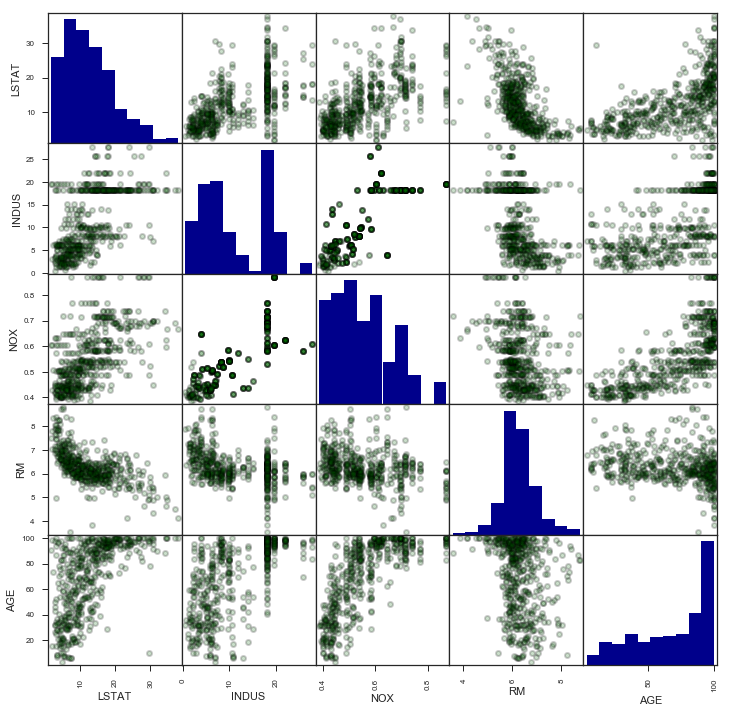

In [306]:
pd.scatter_matrix(x, alpha=0.2, diagonal='hist', color='DarkGreen',figsize=(12, 12),s=100, 
                  hist_kwds={'color':['DarkBlue']},edgecolor='black', linewidth=2, grid=True)

Al observar el gráfico se identifican las siguientes relaciones:

   * La variable AGE tiene relación directa con las variables NOX, LSTAT lo cual indica que a mayor proporción de viviendas  que fueron construidas antes de 1940, mayor es la proporción de estrato bajo de la población y mayor es la concentración de oxido nitrico.
    
   * La variable RM muestra una relación inversa con la variable LSTAT lo que indicaria que a menor promedio de habitaciones por vivienda, mayor porcentaje de estrato bajo.
   
   * La variable NOX presenta relación directa con LSTAT, INDUS y con la variable AGE esto indica que a mayor concentración de oxido nítrico, mayor porcentaje de población de estrato bajo, mayor porcentaje de grandes negocios.
    

* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.


In [307]:
z = pd.concat([x,y], axis=1)
mcorr = np.corrcoef(np.transpose(np.array(z)))
mcorr=np.around(mcorr,3)
cor = pd.DataFrame(mcorr, columns=z.columns, index=z.columns)
cor

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000,0.604,0.591,-0.614,0.602,-0.738
INDUS,0.604,1.000,0.764,-0.392,0.645,-0.484
NOX,0.591,0.764,1.000,-0.302,0.731,-0.427
RM,-0.614,-0.392,-0.302,1.000,-0.240,0.695
AGE,0.602,0.645,0.731,-0.240,1.000,-0.377
MEDV,-0.738,-0.484,-0.427,0.695,-0.377,1.000


* Which characteristics are more correlated?


Al observar la tabla se evidencia que las variables más correlacionadas son **NOX** e **INDUS**, adicionalmente se identifican correlaciones entre **LSTAT** con **AGE**, **LSTAT** y **RM** (inverso).

La variable dependiente **MEDV** presenta alta correlación con  **LSTAT** y **RM**

* BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

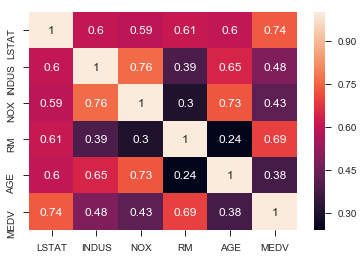

In [308]:
sb.heatmap(abs(cor), annot=True)

En el gráfico anterior se identifica el mapa de calor de la matriz de correlaciones, donde los colores suaves identifican variables con mayor correlación, ahora veamos los casos con correlación superior al 0.7.

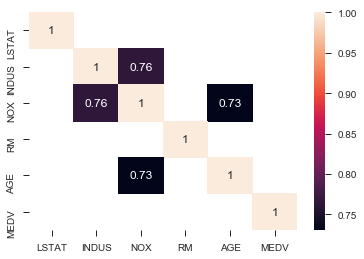

In [309]:
cor[cor>=0.70]
sb.heatmap(abs(cor[cor>=0.70]), annot=True)

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$


In [310]:
x1 = z['RM']
y1 = z['MEDV']

x2 = z['LSTAT']
y2 = z['MEDV']

* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $


In [311]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state=1)
print(x1_train.shape)
print(x1_test.shape)

(354,)
(152,)


* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data


In [312]:
from sklearn.linear_model import LinearRegression
Reg1 = LinearRegression()
Reg1.fit(x1_train[:,None], y1_train)
Reg2 = LinearRegression()
Reg2.fit(x2_train[:,None], y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### MSE para la regresión D1

In [313]:
from sklearn import metrics
y_pred = Reg1.predict(x1_test[:, None])
print('MSE1:', metrics.mean_squared_error(y1_test, y_pred))

MSE1: 36.517214730838624


### MSE para la regresión D2

In [314]:
y2_pred = Reg2.predict(x2_test[:, None])
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))

MSE2: 42.620243471539716


### Parámetros de la regresión para D1

In [315]:
print("Pendiente para D1: "+str(Reg1.coef_))
print("Intercepto para D1: "+str(Reg1.intercept_))


Pendiente para D1: [8.46109164]
Intercepto para D1: -30.571032410898315


### Parámetros de la regresión para D2

In [316]:
print("Pendiente para D2: "+str(Reg2.coef_))
print("Intercepto para D2: "+str(Reg2.intercept_))

Pendiente para D2: [-0.9166916]
Intercepto para D2: 34.22183685037716


### Gráfico de la regresión D1

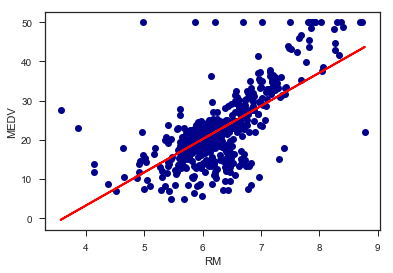

In [317]:
import matplotlib.pyplot as plt
y_new = Reg1.predict(x1[:, None])
plt.plot(x1, y1, 'bo', color='DarkBlue')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(x1, y_new, color='red', linewidth=2)

### Gráfico de la regresión D2

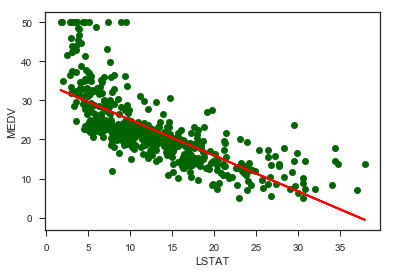

In [318]:
import matplotlib.pyplot as plt
y2_new = Reg2.predict(x2[:, None])
plt.plot(x2, y2, 'bo', color='DarkGreen')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot(x2, y2_new, color='red', linewidth=2)

* How does the model perform on $ D_1 $ and $ D_2 $? Why?



* El modelo D1 representa una función lineal creciente lo cual indica que a mayor promedio del valor de la vivienda, mayor es el promedio de habitaciones por vivienda.
* El modelo D2 representa una relación inversa entre el porcentaje de estrato bajo y el precio promedio de la vivienda lo que indica que a mayor valor menor el el porcentaje de población en estrato bajo.

* Al observar ambos modelos se evidencia un mejor ajuste de los datos entre RM y la variable dependiente MEDV puesto que el error cuadrático medio es menor al obtenido en el modelo D2, adicionalmente el modelo D2 graficamente muestra una tendencia no lineal, lo que sugiere el uso de otro tipo de modelo.

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)


### Regresión lineal con todas las variables

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
print(x1_train.shape)
print(x1_test.shape)
x_train.head()

(354,)
(152,)


,LSTAT,INDUS,NOX,RM,AGE
13,8.26,8.14,0.538,5.949,61.8
61,14.44,5.13,0.453,5.966,93.4
377,21.24,18.10,0.671,6.794,98.8
39,4.32,2.95,0.428,6.595,21.8
365,7.12,18.10,0.718,3.561,87.9


* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [320]:
Reg = LinearRegression()
Reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [321]:
print("Coeficientes: "+str(Reg.coef_))
print("Intercepto: "+str(Reg.intercept_))

Coeficientes: [[-0.66548764 -0.05324372 -4.18898387  4.0158862   0.02084242]]
Intercepto: [7.34489759]


In [348]:
y_predR = Reg.predict(x_test)
print('MSE:', metrics.mean_squared_error(y_test, y_predR))

MSE: 28.680902051432298


* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set


In [346]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor( hidden_layer_sizes=(10,),  activation='relu',   alpha=0.00001, max_iter=100000, shuffle=True)
reg = reg.fit(x_train, y_train)
reg

C:\Users\cayoy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [349]:
y_predMLP = reg.predict(x_test)
print('MSE:', metrics.mean_squared_error(y_test, y_predMLP))

MSE: 21.125529375536743


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).


In [328]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(x)
X_train_s = sc_x.transform(x_train)
X3=pd.DataFrame(X_train_s,columns=x.columns)
X_test_s = sc_x.transform(x_test)
X3.head()

,LSTAT,INDUS,NOX,RM,AGE
0,-0.615792,-0.437258,-0.144217,-0.478164,-0.240919
1,0.250482,-0.876445,-0.878475,-0.453945,0.882795
2,1.203663,1.015999,1.004680,0.725672,1.074822
3,-1.168077,-1.194528,-1.094434,0.442165,-1.663342
4,-0.775590,1.015999,1.410682,-3.880249,0.687212


Train the following models:
   
1. Train a linear regression model using the scaled data.
    
  * Report the mean square error on the test set
     

In [330]:
Reg3 = LinearRegression()
Reg3.fit(X3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:
print("Coeficientes: "+str(Reg3.coef_))
print("Intercepto: "+str(Reg3.intercept_))

Coeficientes: [[-4.7475899  -0.36490958 -0.48492982  2.81884094  0.58611035]]
Intercepto: [22.67551159]


In [350]:
y_predRS = Reg3.predict(X_test_s)
print('MSE:', metrics.mean_squared_error(y_test, y_predRS))

MSE: 28.6809020514323


2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
  * Report the mean square error on the test set
    

In [339]:
from sklearn.neural_network import MLPRegressor
reg2 = MLPRegressor(hidden_layer_sizes=(128,512),  activation='relu',   alpha=0.00001, max_iter=100000, shuffle=True)
reg2 = reg.fit(X_train_s, y_train)
reg2

C:\Users\cayoy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [353]:
y_predMLPS = reg2.predict(X_test_s)
print('MSE:', metrics.mean_squared_error(y_test, y_predMLPS))

MSE: 11.78935109057648


3. Which model has better performance? Why?

In [355]:
print('MSE LINEAR REGRESSION:', metrics.mean_squared_error(y_test, y_predR))
print('MSE MLPRegressor:', metrics.mean_squared_error(y_test, y_predMLP))
print('MSE LINEAR REGRESSION Standarized:', metrics.mean_squared_error(y_test, y_predRS))
print('MSE MLPRegressor Standarized:', metrics.mean_squared_error(y_test, y_predMLPS))

MSE LINEAR REGRESSION: 28.680902051432298
MSE MLPRegressor: 21.125529375536743
MSE LINEAR REGRESSION Standarized: 28.6809020514323
MSE MLPRegressor Standarized: 11.78935109057648


- Al comparar los cuatro últimos modelos se observa que la regresión lineal no se ajusta muy bien a los datos, pues es el modelo con MSE más alto, además escalar o no la base no influye en el resultado obtenido.

- Ahora con el modelo MLP MultiLayer Perceptron se obtienen mejorias en  la predicción, en este caso si se observa una notable diferencia entre usar las variables escaladas o normales puesto que el MSE se reduce a la mitad al escalar las variables.

- El modelo que mejor ajustó es el **MLP escalado**.